# Multi-instrument Data Analysis Workflows with the SunPy Ecosystem

In this notebook, we'll look at how to use the SunPy Ecosystem to analyze data from multiple instruments, including SDO/AIA, EUI/HRI, EUI/FSI, SPICE, and the VISP instrument on DKIST.
The goal is to show how the SunPy Ecosystem allows you to easily work with these disparate datasources using the same set of tools.
The data we'll be looking is from 24 October 2022, close to the *Solar Orbiter* perihelion.
During this period, DKIST was pointed to coincide with this perihelion.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sunpy.net import Fido, attrs as attrs
import astropy.units as u
from astropy.visualization import ImageNormalize, AsinhStretch
import sunpy.map
import sunraster.instr.spice
import dkist

from sunpy.coordinates import get_earth, get_horizons_coord

## Searching for and Downloading Data with `Fido`

INFO: Obtained JPL HORIZONS location for Solar Dynamics Observatory (spac [sunpy.coordinates.ephemeris]
INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144 [sunpy.coordinates.ephemeris]


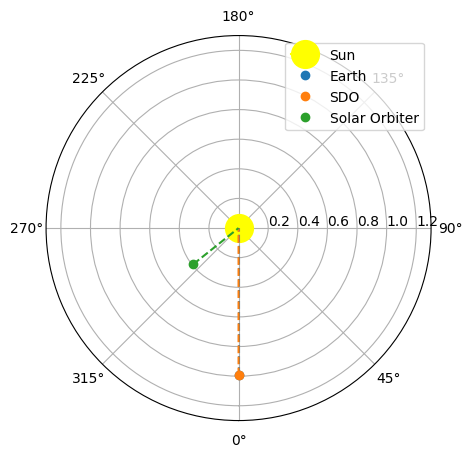

In [6]:
fig = plt.figure(figsize=(5, 5))
ax = plt.subplot(projection='polar')

# Plot the Sun
ax.plot(0, 0, marker='o', markersize=20, label='Sun', color='yellow')

# Plot the satellite locations
obstime = "2022-10-24 19:00"
for body_name in ['Earth', 'SDO', 'Solar Orbiter']:
    if body_name == 'Earth':
        body = get_earth(obstime)
    else:
        body = get_horizons_coord(body_name, time=obstime)
    p, = ax.plot(body.lon.to('rad'), body.radius.to(u.AU), 'o', label=body_name)
    ax.plot([body.lon.to_value('rad'), 0], [body.radius.to_value(u.AU), 0], ls='--', color=p.get_color())

ax.set_theta_zero_location("S")
ax.set_rlabel_position(90)
ax.set_rlim(0, 1.3)
ax.legend()

### SDO/AIA

In [3]:
time_range = attrs.Time("2022-10-24T18:55", "2022-10-24T19:35")

In [4]:
Fido.search(
    time_range,
    attrs.Instrument.aia,
    attrs.Wavelength(171*u.Angstrom),
    attrs.Sample(10*u.minute)
)

<sunpy.net.fido_factory.UnifiedResponse object at 0x7fe41cc14210>
Results from 1 Provider:

4 Results from the VSOClient:
Source: http://vso.stanford.edu/cgi-bin/search
Total estimated size: 271.155 Mbyte

       Start Time               End Time        Source Instrument   Wavelength   Provider  Physobs  Wavetype Extent Width Extent Length Extent Type   Size  
                                                                     Angstrom                                                                        Mibyte 
----------------------- ----------------------- ------ ---------- -------------- -------- --------- -------- ------------ ------------- ----------- --------
2022-10-24 18:55:09.000 2022-10-24 18:55:10.000    SDO        AIA 171.0 .. 171.0     JSOC intensity   NARROW         4096          4096    FULLDISK 64.64844
2022-10-24 19:05:09.000 2022-10-24 19:05:10.000    SDO        AIA 171.0 .. 171.0     JSOC intensity   NARROW         4096          4096    FULLDISK 64.64844
2022-10-24 19:15:09.000 2022-10-24 19:15:10.000    SDO        AIA 171.0 .. 171.0     JSOC intensity   NARROW         4096          4096    FULLDISK 64.64844
2022-10-24 19:25:09.000 2022-10-24 19:25:10.000    SDO        AIA 171.0 .. 171.0     JSOC intensity   NARROW         4096          4096    FULLDISK 64.64844

### Solar Orbiter--EUI and SPICE

In [5]:
import sunpy_soar

In [6]:
Fido.search(
    time_range,
    attrs.soar.Product('EUI-HRIEUV174-IMAGE') | attrs.soar.Product('EUI-FSI174-IMAGE') | attrs.soar.Product('SPICE-N-RAS'),
    attrs.Level(2)
)

<sunpy.net.fido_factory.UnifiedResponse object at 0x7fe41cb24110>
Results from 3 Providers:

360 Results from the SOARClient:

Instrument     Data product    Level        Start time               End time        Filesize           SOOP Name           
                                                                                      Mbyte                                 
---------- ------------------- ----- ----------------------- ----------------------- -------- ------------------------------
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:29:55.174 2022-10-24 19:29:56.824    5.665 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:29:30.174 2022-10-24 19:29:31.824    5.679 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:29:10.174 2022-10-24 19:29:11.824    5.665 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:20:25.173 2022-10-24 19:20:26.823    5.504 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:28:40.174 2022-10-24 19:28:41.824    5.662 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:28:20.204 2022-10-24 19:28:21.854    5.659 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:27:55.188 2022-10-24 19:27:56.838    5.679 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:27:35.189 2022-10-24 19:27:36.839    5.665 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:27:10.174 2022-10-24 19:27:11.824    5.659 R_SMALL_MRES_MCAD_AR-Long-Term
       ...                 ...   ...                     ...                     ...      ...                            ...
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:29:00.174 2022-10-24 19:29:01.824    5.682 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:29:05.174 2022-10-24 19:29:06.824    5.665 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:29:15.174 2022-10-24 19:29:16.824    5.679 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:29:20.188 2022-10-24 19:29:21.838    5.679 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:29:25.174 2022-10-24 19:29:26.824    5.694 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:29:35.196 2022-10-24 19:29:36.846    5.697 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:29:45.174 2022-10-24 19:29:46.824    5.679 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:29:50.174 2022-10-24 19:29:51.824    5.639 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:29:40.206 2022-10-24 19:29:41.856    5.665 R_SMALL_MRES_MCAD_AR-Long-Term
Length = 360 rows

4 Results from the SOARClient:

Instrument   Data product   Level        Start time               End time        Filesize           SOOP Name           
                                                                                   Mbyte                                 
---------- ---------------- ----- ----------------------- ----------------------- -------- ------------------------------
       EUI EUI-FSI174-IMAGE    L2 2022-10-24 19:00:50.195 2022-10-24 19:01:00.195    4.536 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-FSI174-IMAGE    L2 2022-10-24 19:10:50.177 2022-10-24 19:11:00.177    4.513 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-FSI174-IMAGE    L2 2022-10-24 19:20:50.179 2022-10-24 19:21:00.179     4.55 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-FSI174-IMAGE    L2 2022-10-24 19:30:50.174 2022-10-24 19:31:00.174    4.392 R_SMALL_MRES_MCAD_AR-Long-Term

3 Results from the SOARClient:

Instrument Data product Level        Start time               End time        Filesize           SOOP Name           
                                                                   

### DKIST

In [7]:
import dkist.net

In [8]:
Fido.search(
    time_range,
    attrs.Instrument('VISP')
)

<sunpy.net.fido_factory.UnifiedResponse object at 0x7fe41c0e5750>
Results from 1 Provider:

1 Results from the DKISTClient:

       Start Time               End Time        Instrument               Wavelength              ... Average Spectral Sampling Average Spatial Sampling Average Temporal Sampling
                                                                             nm                  ...             nm                     arcsec                      s            
----------------------- ----------------------- ---------- ------------------------------------- ... ------------------------- ------------------------ -------------------------
2022-10-24T18:57:45.634 2022-10-24T19:33:26.865       VISP 630.2424776472172 .. 631.826964866207 ...       0.00162511509639976      0.04160701928854328        1070.6156795058157

### Combining them all...

In [9]:
aia_query = attrs.Instrument.aia & attrs.Wavelength(171*u.Angstrom) & attrs.Sample(10*u.minute)

In [10]:
solo_query = (attrs.soar.Product('EUI-HRIEUV174-IMAGE') | 
              attrs.soar.Product('EUI-FSI174-IMAGE') | 
              attrs.soar.Product('SPICE-N-RAS')) & attrs.Level(2)

In [11]:
dkist_query = attrs.Instrument('VISP')

In [12]:
q = Fido.search(time_range, aia_query | solo_query | dkist_query)

In [13]:
q

<sunpy.net.fido_factory.UnifiedResponse object at 0x7fe41cc4bb10>
Results from 5 Providers:

4 Results from the VSOClient:
Source: http://vso.stanford.edu/cgi-bin/search
Total estimated size: 271.155 Mbyte

       Start Time               End Time        Source Instrument   Wavelength   Provider  Physobs  Wavetype Extent Width Extent Length Extent Type   Size  
                                                                     Angstrom                                                                        Mibyte 
----------------------- ----------------------- ------ ---------- -------------- -------- --------- -------- ------------ ------------- ----------- --------
2022-10-24 18:55:09.000 2022-10-24 18:55:10.000    SDO        AIA 171.0 .. 171.0     JSOC intensity   NARROW         4096          4096    FULLDISK 64.64844
2022-10-24 19:05:09.000 2022-10-24 19:05:10.000    SDO        AIA 171.0 .. 171.0     JSOC intensity   NARROW         4096          4096    FULLDISK 64.64844
2022-10-24 19:15:09.000 2022-10-24 19:15:10.000    SDO        AIA 171.0 .. 171.0     JSOC intensity   NARROW         4096          4096    FULLDISK 64.64844
2022-10-24 19:25:09.000 2022-10-24 19:25:10.000    SDO        AIA 171.0 .. 171.0     JSOC intensity   NARROW         4096          4096    FULLDISK 64.64844

360 Results from the SOARClient:

Instrument     Data product    Level        Start time               End time        Filesize           SOOP Name           
                                                                                      Mbyte                                 
---------- ------------------- ----- ----------------------- ----------------------- -------- ------------------------------
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:29:55.174 2022-10-24 19:29:56.824    5.665 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:29:30.174 2022-10-24 19:29:31.824    5.679 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:29:10.174 2022-10-24 19:29:11.824    5.665 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:20:25.173 2022-10-24 19:20:26.823    5.504 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:28:40.174 2022-10-24 19:28:41.824    5.662 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:28:20.204 2022-10-24 19:28:21.854    5.659 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:27:55.188 2022-10-24 19:27:56.838    5.679 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:27:35.189 2022-10-24 19:27:36.839    5.665 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:27:10.174 2022-10-24 19:27:11.824    5.659 R_SMALL_MRES_MCAD_AR-Long-Term
       ...                 ...   ...                     ...                     ...      ...                            ...
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:29:00.174 2022-10-24 19:29:01.824    5.682 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:29:05.174 2022-10-24 19:29:06.824    5.665 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:29:15.174 2022-10-24 19:29:16.824    5.679 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:29:20.188 2022-10-24 19:29:21.838    5.679 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:29:25.174 2022-10-24 19:29:26.824    5.694 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:29:35.196 2022-10-24 19:29:36.846    5.697 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:29:45.174 2022-10-24 19:29:46.824    5.679 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-HRIEUV174-IMAGE    L2 2022-10-24 19:29:50.174 2022-10-24 19:29:51.824    5.639 R_SMALL_MRES_MCAD_AR-Long-Term
       EUI EUI-HRIEUV174-IMAGE    

In [14]:
files = Fido.fetch(q, path='data/{instrument}')

Files Downloaded:   0%|          | 0/372 [00:00<?, ?file/s]

## Visualizing Fields of View

In [7]:
m_aia = sunpy.map.Map('data/AIA/aia_lev1_171a_2022_10_24t19_15_09_35z_image_lev1.fits')

In [8]:
m_hri = sunpy.map.Map('data/EUI/solo_L2_eui-hrieuv174-image_20221024T191510172_V01.fits')

In [9]:
m_fsi = sunpy.map.Map('data/EUI/solo_L2_eui-fsi174-image_20221024T191050177_V01.fits')

In [10]:
raster_spice = sunraster.instr.spice.read_spice_l2_fits('data/SPICE/solo_L2_spice-n-ras_20221024T191303_V04_150995395-059.fits')
spice_window = raster_spice['N IV 765 - SH - Comp 8 ... Ne VIII 770 - LH - Comp 8 (Merged)'].apply_exposure_time_correction()

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
Set MJD-OBS to 59876.800736 from DATE-OBS.
Set MJD-BEG to 59876.800736 from DATE-BEG.
Set MJD-AVG to 59876.804662 from DATE-AVG.
Set MJD-END to 59876.808585 from DATE-END'. [astropy.wcs.wcs]


In [11]:
visp = dkist.load_dataset("./data/VISP/VISP_L1_20221024T185745_BKEWK_updated.asdf")
visp.files.basepath = "/home/stuart/dkist_data/BKEWK/"

The FSI field of view is quite large so let's zoom in on it a bit.

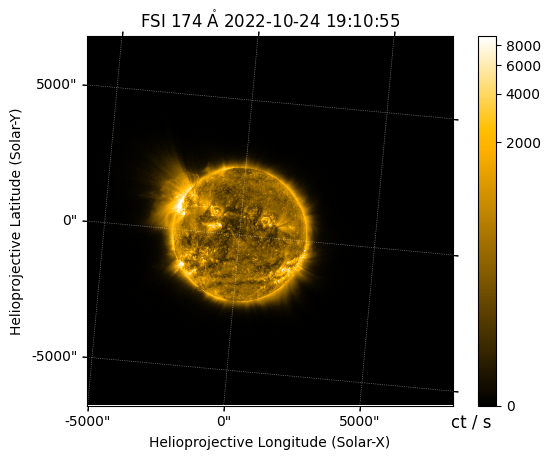

In [12]:
m_fsi.peek()

In [13]:
from astropy.coordinates import SkyCoord

In [14]:
m_fsi_zoom = m_fsi.submap(SkyCoord(-3000,-3000, unit='arcsec', frame=m_fsi.coordinate_frame),
                          top_right=SkyCoord(3000, 3000, unit='arcsec', frame=m_fsi.coordinate_frame))

We can then overlay field of view of HRI to show what feature on the disk HRI is looking at.

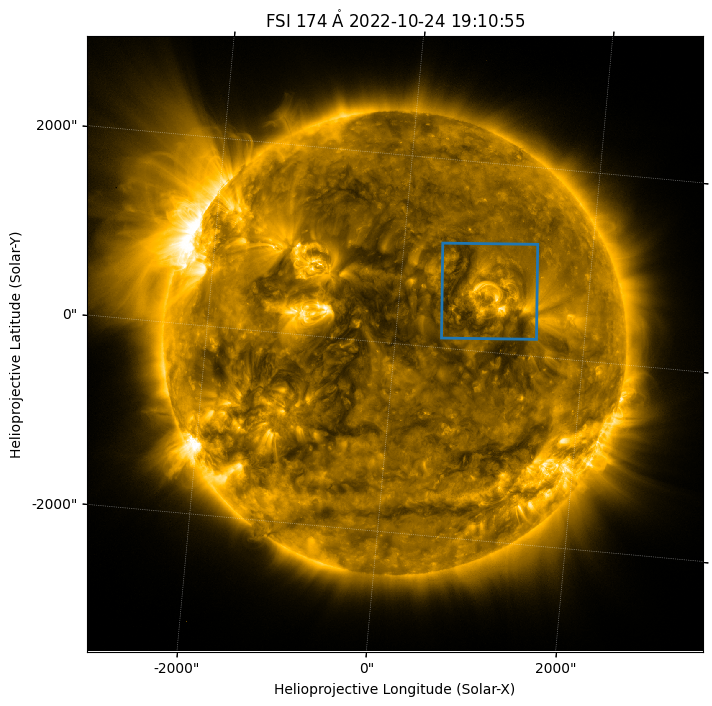

In [15]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection=m_fsi_zoom)
m_fsi_zoom.plot(axes=ax)
m_fsi_zoom.draw_quadrangle(
    [0,0]*u.pix,
    top_right=u.Quantity(m_hri.dimensions),
    label='HRI',
    edgecolor='C0',
    lw=2,
    transform=ax.get_transform(m_hri.wcs),
)

Now, let's overlay the fields of view of our other instruments on top of this FSI image.

In [16]:
visp_frame = visp.wcs.output_frame.frames[1].reference_frame
visp_space = visp[0, :, 500, :]
visp_corners = visp_space.wcs.pixel_to_world([0, visp_space.data.shape[1]-1],[0, visp_space.data.shape[0]-1])[0]

In [17]:
m_spice = sunpy.map.Map(spice_window[0,51,:,:].data, spice_window[0,51,:,:].meta)

In [18]:
import sunpy.visualization.drawing

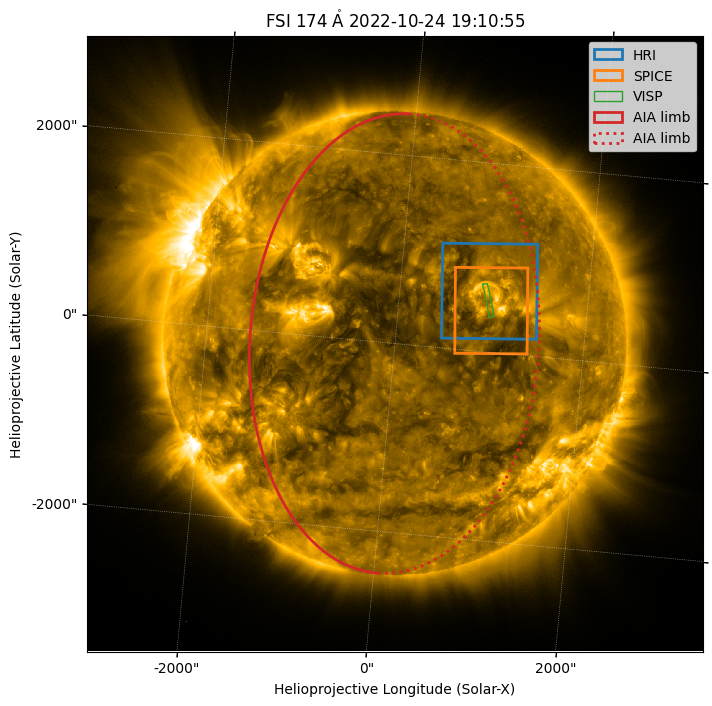

In [19]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection=m_fsi_zoom)
m_fsi_zoom.plot(axes=ax)
m_fsi_zoom.draw_quadrangle(
    [0,0]*u.pix,
    top_right=u.Quantity(m_hri.dimensions),
    label='HRI',
    edgecolor='C0',
    lw=2,
    transform=ax.get_transform(m_hri.wcs),
)
m_fsi_zoom.draw_quadrangle(
    [0,0]*u.pix,
    top_right=u.Quantity(m_spice.dimensions),
    label='SPICE',
    edgecolor='C1',
    lw=2,
    transform=ax.get_transform(m_spice.wcs),
)
m_fsi_zoom.draw_quadrangle(
    visp_corners,
    label="VISP",
    edgecolor='C2',
    lw=1,
    transform=ax.get_transform(visp_frame)
)
sunpy.visualization.drawing.limb(ax, m_aia.observer_coordinate, rsun=m_aia.rsun_meters, color='C3', lw=2, label='AIA limb')
ax.legend()

Similarly, we can overlay these same fields of view on our full-disk AIA image.

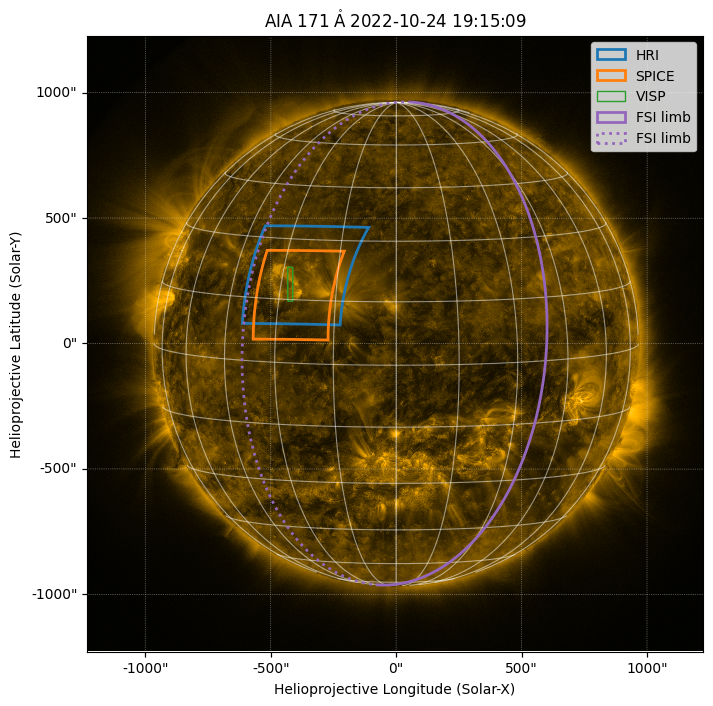

In [20]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection=m_aia)
m_aia.plot(axes=ax)
m_aia.draw_quadrangle(
    [0,0]*u.pix,
    top_right=u.Quantity(m_hri.dimensions),
    label='HRI',
    edgecolor='C0',
    lw=2,
    transform=ax.get_transform(m_hri.wcs),
)
m_aia.draw_quadrangle(
    [0,0]*u.pix,
    top_right=u.Quantity(m_spice.dimensions),
    label='SPICE',
    edgecolor='C1',
    lw=2,
    transform=ax.get_transform(m_spice.wcs),
)
m_aia.draw_quadrangle(
    visp_corners,
    label="VISP",
    edgecolor='C2',
    lw=1,
    transform=ax.get_transform(visp_frame)
)
m_aia.draw_grid(axes=ax)
sunpy.visualization.drawing.limb(ax, m_fsi.observer_coordinate, rsun=m_fsi.rsun_meters, color='C4', label='FSI limb', lw=2)
ax.legend()

## Reading in Cutouts

In [21]:
center = SkyCoord(Tx=930*u.arcsec, Ty=630*u.arcsec, frame=m_hri.coordinate_frame)
width = 350*u.arcsec
height = 250*u.arcsec
loop_fov = center.spherical_offsets_by(width/[-2, 2], height/[-2, 2])

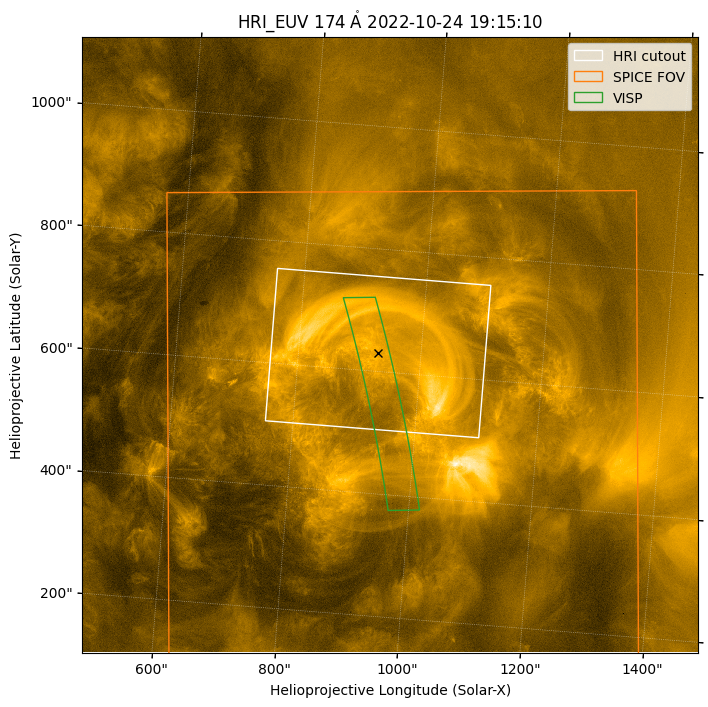

In [22]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection=m_hri)
m_hri.plot(axes=ax)
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()
m_hri.draw_quadrangle(
    loop_fov[0],
    top_right=loop_fov[1],
    label="HRI cutout",
)
m_hri.draw_quadrangle(
    [0,0]*u.pix,
    top_right=u.Quantity(m_spice.dimensions),
    label='SPICE FOV',
    edgecolor='C1',
    transform=ax.get_transform(m_spice.wcs),
)
m_hri.draw_quadrangle(
    visp_corners,
    label="VISP",
    edgecolor='C2',
    transform=ax.get_transform(visp_frame)
)
ax.plot_coord(center, marker='x', color='k', ls=' ')
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
plt.legend()

In [23]:
import pathlib
import warnings

import astropy.io.fits
import astropy.wcs
from astropy.nddata import Cutout2D

from sunpy.coordinates import propagate_with_solar_surface

In [24]:
hri_maps = []
for filename in sorted(pathlib.Path('./data/EUI/').glob('solo_L2_eui-hrieuv174-image_*.fits')):
    with astropy.io.fits.open(filename) as hdul:
        with warnings.catch_warnings():  # silence some astropy FITS warnings
            warnings.simplefilter('ignore', astropy.wcs.FITSFixedWarning)
            wcs = astropy.wcs.WCS(hdul[1].header)
        with propagate_with_solar_surface():  # transform with solar rotation
            cutout = Cutout2D(hdul[1].section,  # cutout from full-image
                              position=center,
                              size=(height, width),
                              wcs=wcs)
    hri_maps.append(sunpy.map.Map(cutout.data, cutout.wcs))  # create sunpy map

KeyboardInterrupt: 

In [ ]:
hri_maps = sunpy.map.Map(hri_maps, sequence=True)

In [ ]:
ani = hri_maps.plot(cmap=m_hri.plot_settings['cmap'],
                    norm=ImageNormalize(vmin=5e2, vmax=1.75e4,
                                        stretch=m_hri.plot_settings['norm'].stretch))
ani.save('eui-hri-loops.mp4', fps=15, dpi=300)

In [ ]:
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="60%" controls>
      <source src="eui-hri-loops.mp4" type="video/mp4">
</video>
</div>""")

We can also examine how this loop structure varies in the AIA data.

In [ ]:
aia_maps = []
for filename in sorted(pathlib.Path('data/AIA').glob('*.fits')):
    m_aia_full = sunpy.map.Map(filename)
    with propagate_with_solar_surface():
        m_aia_cutout = m_aia_full.submap(hri_maps[0].bottom_left_coord, top_right=hri_maps[0].top_right_coord)
    aia_maps.append(m_aia_cutout)
aia_maps = sunpy.map.Map(aia_maps, sequence=True)

In [ ]:
ani = aia_maps.plot(cmap=m_aia.plot_settings['cmap'],
                    norm=ImageNormalize(vmin=150, vmax=2e3,
                                        stretch=m_aia.plot_settings['norm'].stretch))
ani.save('sdo-aia-loops.mp4', fps=2, dpi=300)

In [ ]:
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="60%" controls>
      <source src="sdo-aia-loops.mp4" type="video/mp4">
</video>
</div>""")

## Feature Identification

There is a clear loop structure present in the above HRI image.
We can construct a coordinate that traces this structure.
Here, we'll do this manually, but we could imagine doing this with a point-and-click tool or a loop tracing algorithm.

In [25]:
traced_loop =  SkyCoord(
    Tx=[786, 809, 853, 895, 955, 998, 1025, 1035, 1040, 1038, 1029]*u.arcsec,
    Ty=[623, 662, 703, 716, 715, 697, 664, 628, 594, 567, 541]*u.arcsec,
    frame=hri_maps[0].coordinate_frame,
)

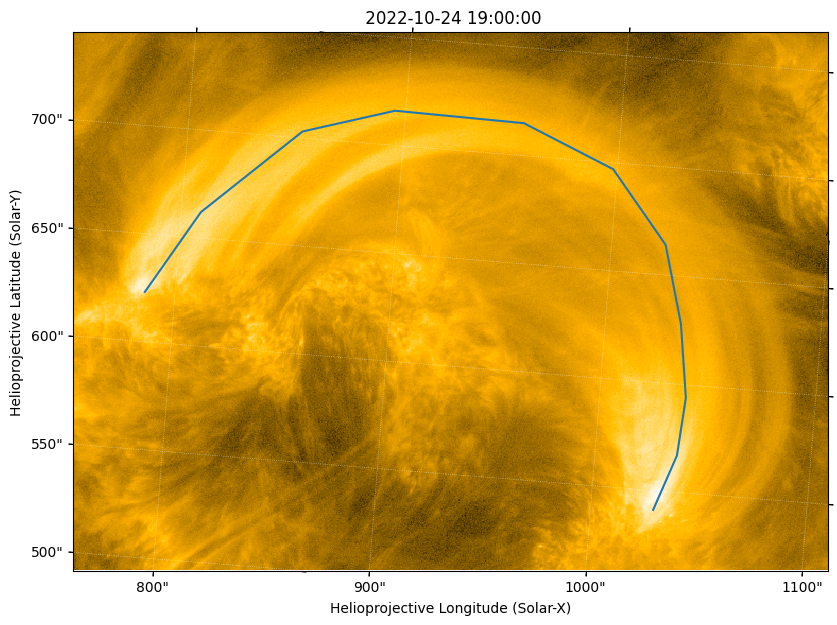

In [26]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(projection=hri_maps[0].wcs)
hri_maps[0].plot(axes=ax, **m_hri.plot_settings)
ax.plot_coord(traced_loop)

### EUI HRI: Time-distance Analysis

Next, we can trace out this structure in each frame of our HRI image to create a stack plot or a "time-distance" plot.

In [ ]:
from scipy.interpolate import interp1d

In [ ]:
traced_loop_pixelated = sunpy.map.pixelate_coord_path(hri_maps[0], traced_loop)
traced_loop_distance = traced_loop_pixelated.separation(traced_loop_pixelated[0])

In [43]:
intensity_stack = []
for m in hri_maps:
    _traced_loop_pixelated = sunpy.map.pixelate_coord_path(m, traced_loop)
    _traced_loop_distance = _traced_loop_pixelated.separation(_traced_loop_pixelated[0])
    intensity = sunpy.map.sample_at_coords(m, _traced_loop_pixelated)
    f_interp = interp1d(_traced_loop_distance.to_value('arcsec'), intensity.value, fill_value='extrapolate', kind='linear')
    intensity_interp = f_interp(traced_loop_distance.to_value('arcsec'))
    intensity_stack.append(u.Quantity(intensity_interp, intensity.unit))
intensity_stack = u.Quantity(intensity_stack)

We'll then build an `NDCube` data structure with an axis for time and distance along the loop

In [44]:
import astropy.time
from ndcube import NDCube
from ndcube.extra_coords import SkyCoordTableCoordinate, TimeTableCoordinate

In [57]:
wcs = (SkyCoordTableCoordinate(traced_loop_pixelated,
                               physical_types=("custom:pos.helioprojective.lon", "custom:pos.helioprojective.lat")) & 
       TimeTableCoordinate(astropy.time.Time([m.date for m in hri_maps]), physical_types="time", names="time")
      ).wcs

In [58]:
hri_time_distance = NDCube(intensity_stack, wcs)

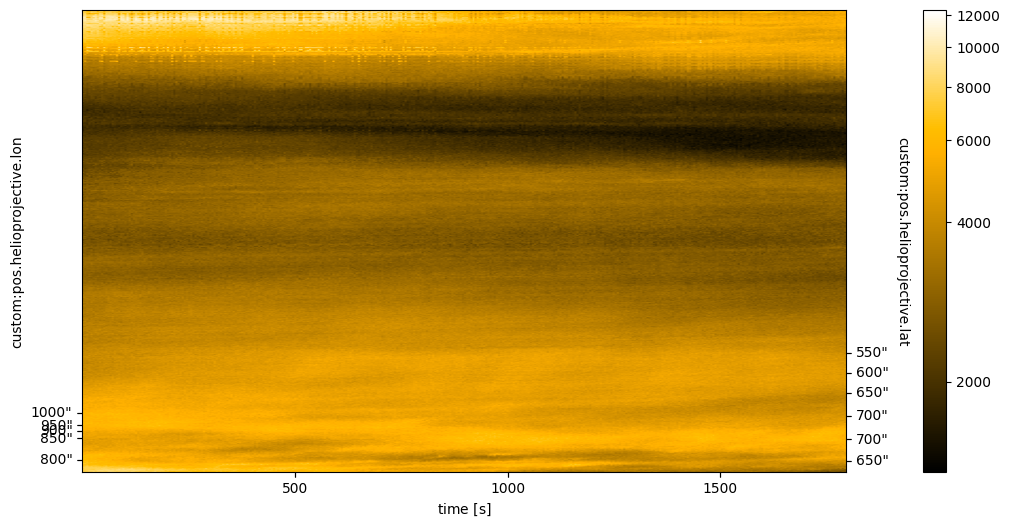

In [59]:
plt.figure(figsize=(20,6))
hri_time_distance.plot(plot_axes=('x','y'), cmap='sdoaia171', norm=ImageNormalize(stretch=AsinhStretch()), aspect=.2)
plt.colorbar()

### SPICE: Spectra along loop

What does this look like in the SPICE data?
We can overlay this same loop structure on top of the SPICE raster.

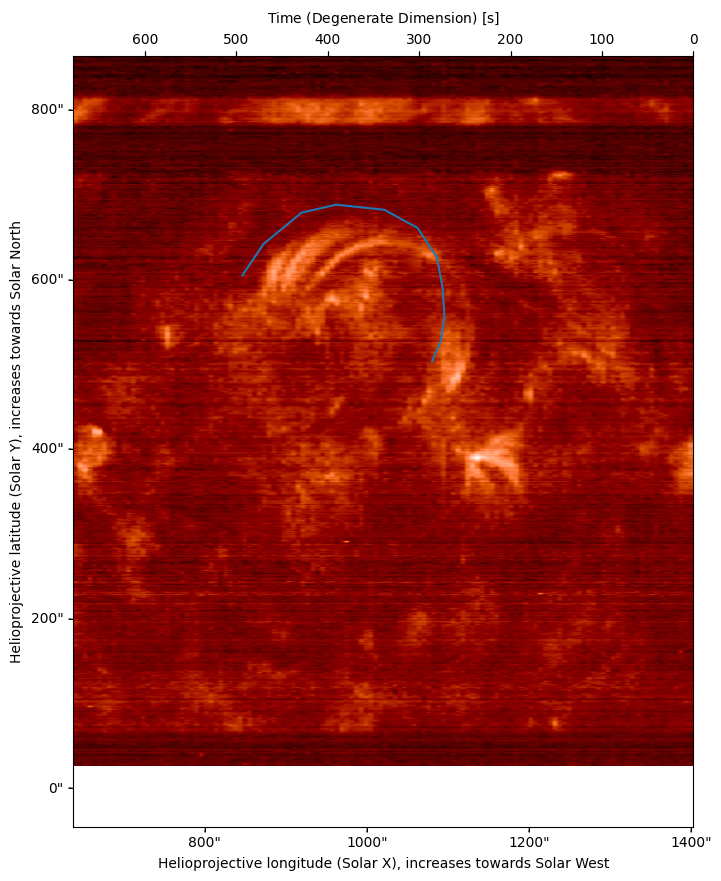

In [48]:
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(projection=spice_window[0,51,:,:].wcs)
spice_window[0,51,:,:].plot(axes=ax,
                            aspect='auto',
                            cmap='irissjiFUV',
                            norm=ImageNormalize(stretch=AsinhStretch()))
with propagate_with_solar_surface():
    pix = spice_window[0,51,:,:].wcs.world_to_pixel(traced_loop, traced_loop.obstime)
ax.plot(*pix)

In [49]:
m_spice_adjust = m_spice.shift_reference_coord(-38*u.arcsec, 20*u.arcsec)

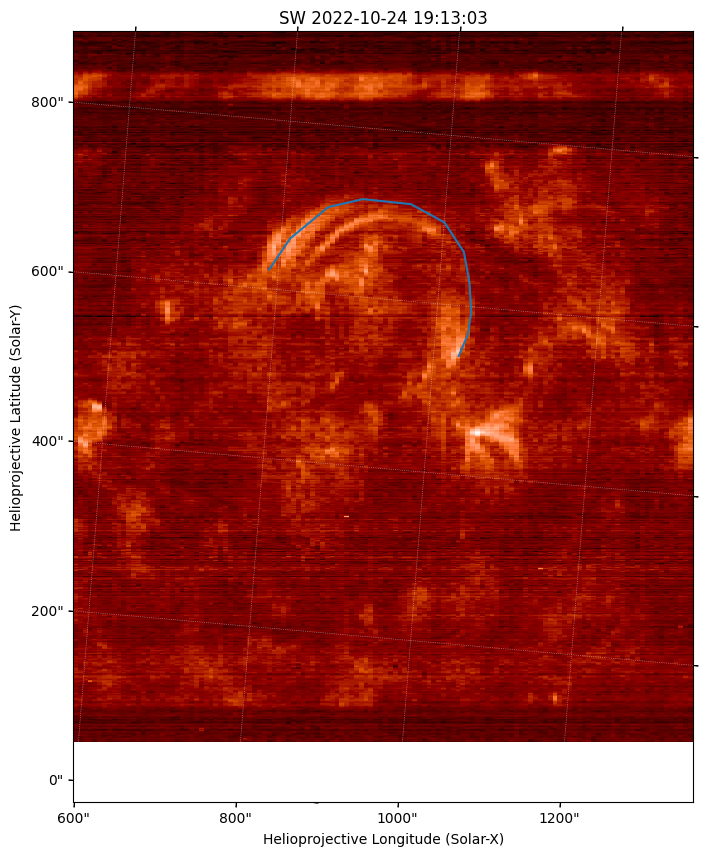

In [50]:
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(projection=m_spice_adjust)
m_spice_adjust.plot(axes=ax,
                    aspect='auto',
                    cmap='irissjiFUV',
                    norm=ImageNormalize(stretch=AsinhStretch()))
with propagate_with_solar_surface():
    pix = m_spice_adjust.wcs.world_to_pixel(traced_loop)
ax.plot(*pix)

Then, we can extract the spectra along each point of the loop we designated above.

In [51]:
from ndcube.extra_coords import QuantityTableCoordinate

In [52]:
# Use the adjusted map to extract the intensity
traced_loop_pixelated = sunpy.map.pixelate_coord_path(m_spice_adjust, traced_loop)
array_indices = m_spice_adjust.wcs.world_to_array_index(sunpy.map.pixelate_coord_path(m_spice_adjust, traced_loop_pixelated))
intensity = spice_window[0].data[:, array_indices[0], array_indices[1]]
# Construct the world coordinate system
wcs = (SkyCoordTableCoordinate(traced_loop_pixelated,
                               physical_types=("custom:pos.helioprojective.lon", "custom:pos.helioprojective.lat")) & 
       QuantityTableCoordinate(spice_window[0].axis_world_coords_values("em.wl").em_wl,
                               physical_types="em.wl")).wcs
# Build an NDCube
spice_intensity =  NDCube(intensity, wcs)

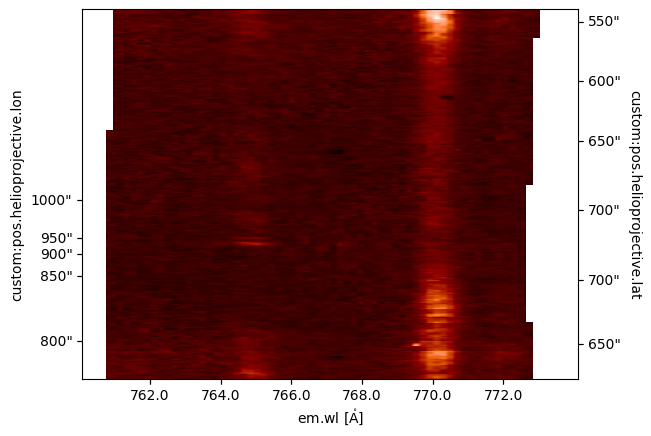

In [53]:
ax = spice_intensity.plot(aspect="auto", cmap='irissjiFUV', plot_axes=('x','y'))
wave = ax.coords[2]
wave.set_format_unit(u.AA)
wave.set_major_formatter("x.x")

### DKIST/VISP: Extracting a spectra

Finally, let's extract a VISP spectra for one of the points along our loop.

This plot takes a while as it computes the adjusted pointing and reads the data from a FITS file for each of the 1000 raster step positions.

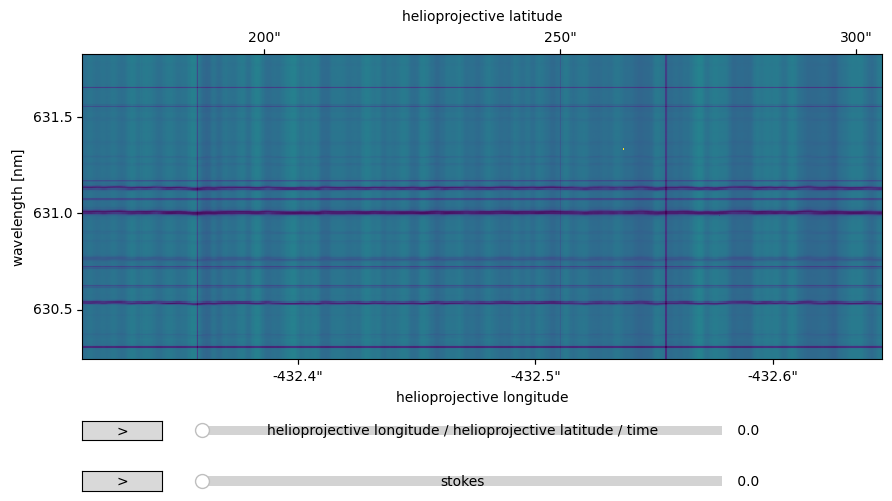

In [69]:
fig = plt.figure(figsize=(10, 11))
visp.plot(fig=fig)

In [70]:
from astropy.time import Time
from astropy.visualization import quantity_support
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7f81475a9ed0>

In [51]:
visp_array_coords = visp[0,:,0,:].wcs.world_to_array_index(center, Time("2022-10-24T18:57:45.634"))

Text(0, 0.5, 'Intensity [ct]')

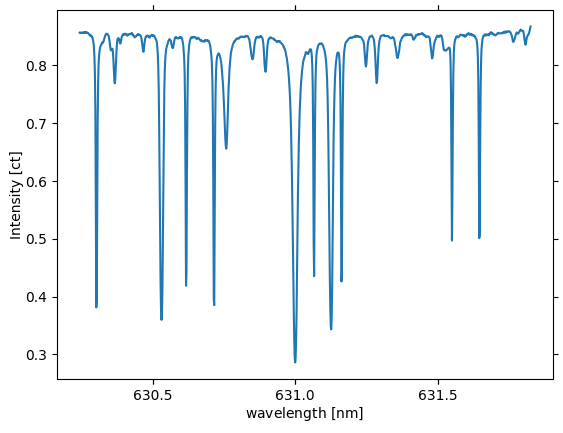

In [50]:
fig = plt.figure()
ax = fig.add_subplot(projection=visp[0,0,:,0].wcs)
ax.plot(visp[0, array_coords[0], :, array_coords[1]].data)
ax.set_ylabel(f"Intensity [{visp.unit}]"

In [53]:
spice_array_coords = m_spice.wcs.world_to_array_index(center)

In [66]:
visp_wave = visp.axis_world_coords("em.wl")[0]
spice_wave = spice_window.axis_world_coords("em.wl")[0].to(u.nm)

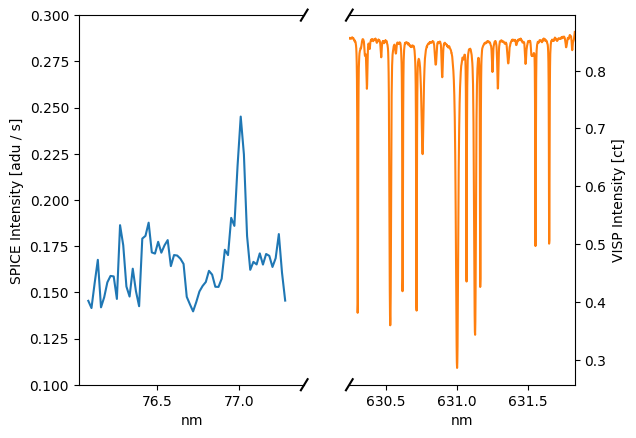

In [82]:
fig, (ax, ax2) = plt.subplots(1, 2, facecolor='w')

ax.plot(spice_wave, spice_window[0].data[:, spice_array_coords[0], spice_array_coords[1]], color="C0")
ax2.plot(visp_wave, visp[0, visp_array_coords[0], :, visp_array_coords[1]].data, color="C1")

ax.set_xlim(np.min(spice_wave), np.max(spice_wave))
ax2.set_xlim(np.min(visp_wave), np.max(visp_wave))

ax.set_ylim(0.1, 0.3)

ax.set_ylabel(f"SPICE Intensity [{spice_window.unit}]")
ax2.set_ylabel(f"VISP Intensity [{visp.unit}]")

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright=False)
ax2.yaxis.tick_right()
ax2.tick_params(labelright=True)
ax2.yaxis.set_label_position("right")

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d, 1+d), (-d, +d), **kwargs)
ax.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1-d, 1+d), **kwargs)
ax2.plot((-d, +d), (-d, +d), **kwargs)

## Bringing it all together

I'm not sure how to best summarize all of this together...reprojection? 